# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

We see that our driving agent which is a white 'smartcab' is idling at one of the intersections. It is always waiting in the same position and does not move. Its positions are initialized randomly every time we run the simulation and with every Trial but its action is always the same, i.e. it idles at the intersection it is present.

The environment consists of multiple grid based roads along with the cars on them and traffic lights present at each intersection. There is a Udacity logo on one of the intersection and this could be the destination for our smartcab.

The smartcab currently receives two kinds of rewards. A small positive reward for waiting at red light and a large negative reward for not moving at a green light.

The simulation also shows the current trial and the outcome of the previous trial. At every trial, the starting position of cab and its destination gets updated randomly.



### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

♦ In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.
- Display: With this flag we can choose to view the simulation or not. Default is set to True. So if we set it to False, we will not be able to view the simulation.
- num_dummies: This flag sets the number of total cars on the roads. As the default value=100, so we can see total count of cars in our simulation is 100. If we set this flag to 2, there will be 2 cars in all on the simulation screen.
- grid_size: Grid size sets the value of the number of lanes. By default this value is set to (8,6) which means that there are 8 NS lanes and 6 EW lanes. If we change it to (4,3), in the simulation we can see that the now there will be 4 NS lanes and 3 EW lanes.

♦ In the environment.py Python file, what Environment class function is called when an agent performs an action?
- The Environment class calls the act() function when our driving agent performs an action.

♦ In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?
- Render_text() renders the simulation data in the command prompt or Python console.
- Render() function renders the actual simulation in the Pygame GUI screen.


♦ In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?
- The next_waypoint() function is used to decide which immediate course of action to take. As per the code, this function checks if the destination is East or West of current location first and then checks if the destination is North or South of location.

## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


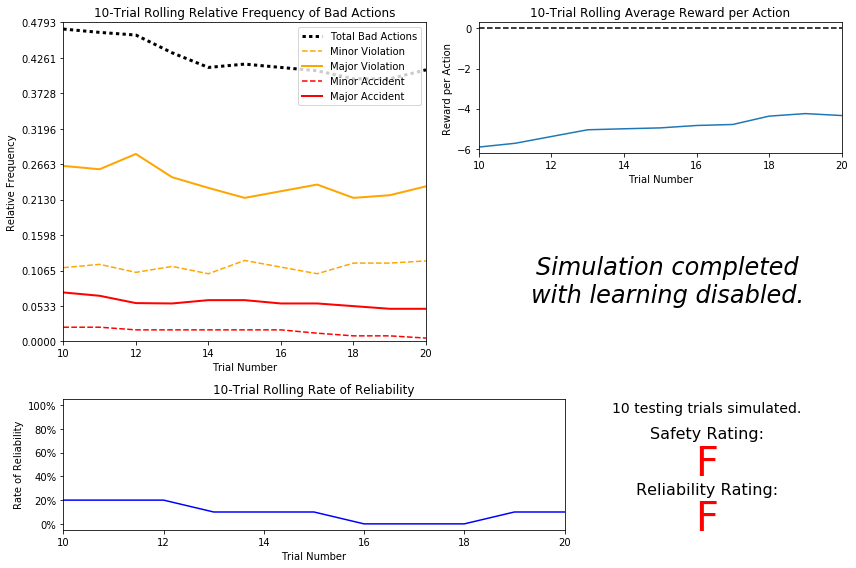

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- We can infer from the top-left plot(Trial vs Relative frequency) that the agent makes bad decisions with a frequency of about 0.4 as seen from the black dotted line. This means that with random actions, the agent's decisions are bad ~40% of the time. This includes major accidents which happen around 5% of the time and minor accidents which occur 2% of the time. Most common bad decision is Major traffic violation such as not stopping on a red light.
- Rate of Reliability is the percentage of times out smartcab reaches the destination on time. The plot of number of trials vs Reliability rate shows that for current simulation, the driving agent's reliability rate is around 10%. It makes little sense because driving randomly, the chances of even reaching the destination are slim, leave alone reaching destination on time. The value that we have received should be attributed to luck factors.
- Our agent receives two kinds of rewards: positive and negative. For good actions, the agent receives positive rewards and for bad actions, agents receives negative rewards. The values in the average rewards per action vs trials plot shows the agent's average rewards per action for a given number of trials. It clearly suggests that our agent as been penalized negatively overall. But as per the first point above, the agent's decisions are bad only about ~40% of the times i.e good for ~60% of the times. So, it means that the penalty for bad actions is heavier than credit for good actions which is also intuitively logical. For example, stopping on a red light is good, but causing an accident is very bad and should be heavily penalized.
- Even as the number of trials increases, the outcome does not vary much. I could not find any significant difference in any of the values and the plots show a wavy nature.
- This smartcab is definitely unsafe and also unreliable. It violates rules/causes accidents around 40% of the time which is way too high if we compare it with human drivers and also does not meet the estimated time of arrival at desination almost 90% of the time. Correctly so, we see that the safety rating and the reliability rating is F.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

<b>waypoint:</b> waypoint is necessary for effeciency. 
- The feature waypoint is the direction on which the smartcab should drive relative to the currect heading. If our agent cannot learn the best waypoint it will not take the action that reduces the most L1 distance and hence affect the efficiency.

<b>inputs:</b> inputs is necessary for safety.

- inputs is a necessary feature for safety as it provides key observations from the environment such as position and intended actions of other agents and color of traffic light. With this feature, Smartcab can learn a safe policy such as stop if red light, proceed if green which will improve safety ratings of the Smartcab.

<b>deadline</b>: Deadline would not help in actally deciding the policy for reliability but it is merely a measure of reliability and would not be appropriate to be used as a feature.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

We can consider the below factors to account in out state space.
Considering `'waypoint'` we get 3 options: `'forward', 'left', 'right'`.
Considering `'inputs'`, we get 2 options for `'light': 'red' and 'green'`; and we get 4 options, `'None', 'forward', 'left' and 'right'` for each of the following 3 senses `'oncoming', 'left' and 'right'`.
So a total of 3 x 2 x 4 x 4 x 4 = 384.


So, we have 384 unique combinations of possible states that can be encountered by our driving agent. However, if we analyze the policy that our agent needs to take, we can see that the inputs from the agents to our right do not affect our actions.( This is explained in the below section on *Optimal Policy Summary*).So, we can drop this to reduce our statespace to only waypoint,inputs of light, inputs of oncoming and inputs of left.
So a new **total of 3 x 2 x 4 x 4 = 96**. Thus, *the size of our statespace comes out to be 384*

For learning a policy for each possible state the agent would require a huge amount of training trials. Also, like in real world, we cannot tell for certain that after even after a lot of training trials, that the agent is guaranteed to visit each state. Some of the states will be reached very often while some may never be reached. We can try to consider a lower number of states if we find out that our agent is unable to cover all the states.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

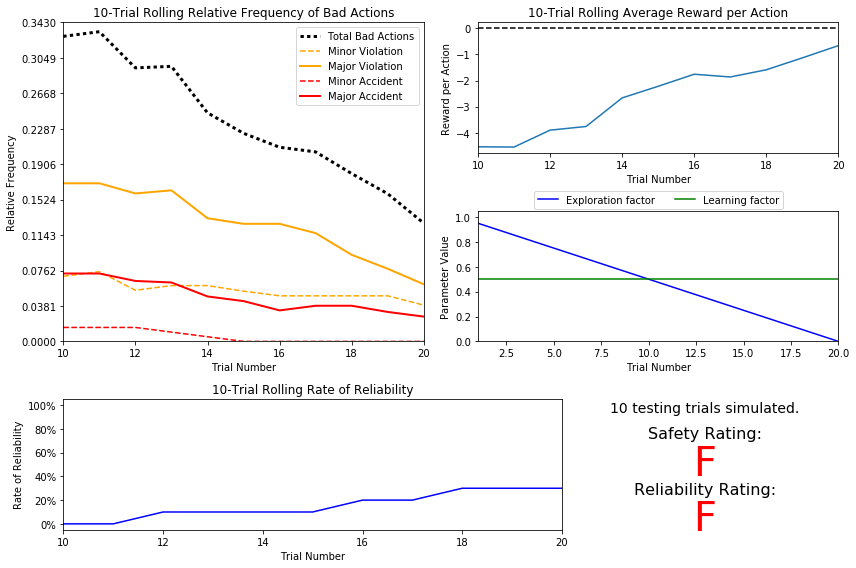

In [26]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The default Q-Learning simulation plot above shows some similarities as well as some differences with the plot of random driving agent of **Question 3**.


**Similarities:**
- The initial Basic driving agent and Q-Learning agent both received a score of **F** in **safety** as well as **reliability** in their testing trials. 
- Both the agents have a **high value** for **major accidents** around 6% which remains more or less constant even as the training increases. 
- The agents show a high appreciation for rewards as **average reward per action** value have gone up with **increase** in training trials.

**Differences:**
- The Q-Learning agent mangaged to **reduce** the counts of **total bad actions** including, mostly major violations considerably as it got trained.
- As exploration factor **eplison decayed**, the Q-Learning agent chose **known policy** with greater probability **over random policy**. The basic driving agent always chose random policy.
- Q-Learning agents exploration factor decreased with every training, whereas it was constant for basic agent.


As the epsilon tolerance was set to be greater than 0, and the epsilon decaying function was chosen such that it continuously drops in value by 0.05 with each training trial. As seen from the above plot, we were able to perform **20 training trials**. One for each of 0.95, 0.90, ... 0.05, 0.0. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

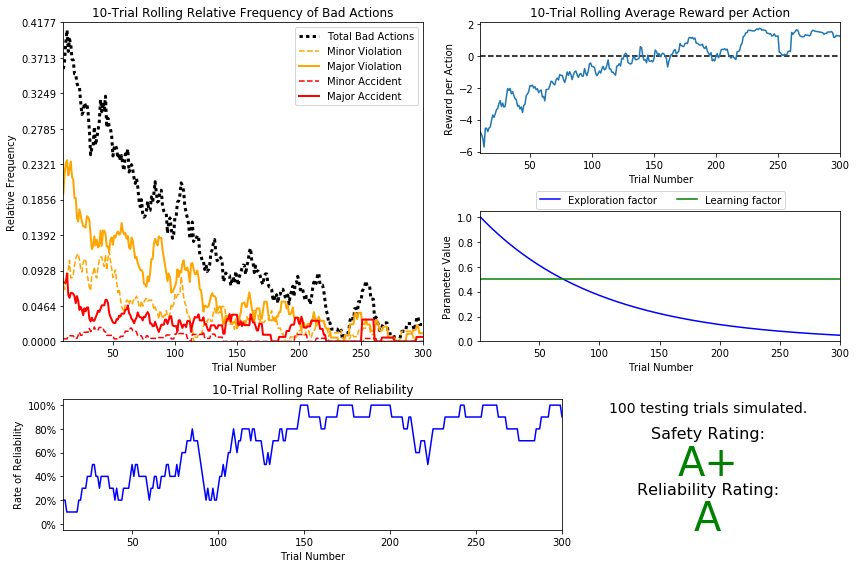

In [28]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**


- The below decaying function used for epsilon. Number of training trials required before testing was 300. $$ \epsilon = a^t, \textrm{for } 0 < a < 1 \, (a = 0.99) $$
- I chose to adjust the epsilon value such that we get approx. 300 trials before epsilon drops below the default epsilon threshold of 0.05. There is no good way of defining how many trials would be needed  as in each trial, the agent may not reach each and every state. And some states will be reached a lot whereas some states may never be reached. In real world problems like the Standord autonomous helicopter, a small gush of wind will change the helicopter's state to an hiterto unknown value. So, its always good to have a high number of training trials to increase the probability of learning most of the states if not all atleast in a deterministic setting like our problem.
- The learning rate used was a constant value of 0.5. Learning rate defines how much new information will override the known information. If we set alpha = 0, the agent does not learn anything. If we set aplha = 1, the agent would always prefer the most recent information. A factor of 0.5 will give equal weightage to new information as well as historical information. For this reason, the aplha value was set to 0.5.
- The performance of optimized Q-learner has improved a lot over the default Q-learner. Default Q-learner did not pass the tests as it scored an F grade on both safety and reliability measures. The optimized Q-learner scores A+ on safety and A on reliability.
- The sim_improved_results.txt file shows the Q-learning values for various actions for various states from the Q-table. If we go through the values, we can find out that for most of the states, the correct actions have the larger values compared to incorrect actions. So, it is safe to say that that the driving agent has learned an optimal policy.
- It was imperative to have A+ rating for safety. Passenger safety should be the number 1 priority for an autonomous cab company. It would have been great to have an A+ rating for reliability as well but I am satisfied with the A rating received here as cab reaching on time 9 out of 10 times is not bad.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

Optimal policy for the smartcab can be summarized as follows:

**Optimal Policy Summary:**

Light is **Red**
- Idle if waypoint is Forward or Left. 
- Turn Right if waypoint is Right and inputs['left'] is Not Forward.

Light is **Green** and Waypoint is **Forward**
- Idle if inputs['right'] is Right.
- Move Forward if otherwise.

Light is **Green** and Waypoint is **Left**
- Make a left turn if inputs['oncoming'] is None.
- Idle if otherwise.

Light is **Green** and Waypoint is **Right**
- Turn Right if inputs['oncoming'] is not Left.
- Idle if otherwise.

**State Function:**

 `state = (waypoint, inputs['oncoming'], inputs['left'], inputs['light'])`

From the sim_improved_learning.txt file, we can observe that the policy for the states. For most of the states, the agent has learnt an optimal policy. However there are a few instances where we can see suboptimal policy being preferred. Below are some of these observations. Please refer the Optimal policy summary above to understand why these instances are optimal or suboptimal.

**Optimal Policy instances**
- For the below state, our agent correctly chose to **turn right** on **Red light** as waypoint was right and inputs['left'] was None.

`('right', 'right', None, 'red')
 -- forward : -8.27
 -- right : 34.23
 -- None : 19.92
 -- left : -24.46`
 
- For the below state, our agent correctly chose to **Idle** on **Red light** as waypoint was right but inputs['left'] was Forward.

` ('right', 'forward', 'forward', 'red')
 -- forward : -40.05
 -- right : -17.53
 -- None : 7.77
 -- left : -39.41`

- For the below state, our agent optimally chose to move **Forward** on a **Green Light**

 `('forward', 'forward', 'forward', 'green')
 -- forward : 16.14
 -- right : 3.12
 -- None : -0.08
 -- left : 2.43`
 
 
 **Suboptimal Policy Instances**
 
 - For the below state, our agent has higher values for **Left** instead of **Right**. 
 
 `('right', None, 'forward', 'green')
 -- forward : 45.32
 -- right : 49.81
 -- None : 29.99
 -- left : 58.21`

- For the below state, our agent has subooptimal policy to **Turn Right** instead of **Idling**

`('forward', 'left', None, 'red')
 -- forward : 54.09
 -- right : 88.62
 -- None : 53.38
 -- left : 66.04`


The chosen value of learning rate aplha and also the exploration factor will have a significant impact on the policy of a state. As seen above, the values of the optimal and suboptimal policy is very close. The agent could have chosen the suboptimal action randomly but it did not produce any major violation and it got a small positive reward. Over multiple training trials, these values can add up and and cause the agent to chose the suboptimal policy over the optimal policy as the exploration probability decreases with number of trials.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different 
states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

If we chose to incorporate future rewards in the algorithm, the smartcab will try to take the actions that take the least time to reach the destination and will cause major traffic violations such as not stopping on Red lights.

Also, the environment in this case is such that the future rewards cannot affect how the agent will perform current actions. For example, even if the agent comes to know that reaching destination has higher rewards, or accidents fetch high negative rewards, this information does not help the agent in anyway to choose its current policy.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.